In [91]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import cPickle as pickle
from os.path import isfile
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap

In [250]:
def rgb2gray(rgb):
    '''converts rgb np matrix image to grayscale np matrix image'''
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def grayplt(img):
    side = int(np.sqrt(len(img)))
    if len(img.shape) == 1:
        img = img.reshape(side, side)
    plt.imshow(img, cmap='gray')
    
def plot_embedding(y, embedding, exclude=[]):
    print len(y)
    for digit, new_point in zip(y, embedding):
        #plt.plot(new_point[0], new_point[1], 'C'+str(digit)+'o')
        digit = digit[0]
        if not digit in exclude:
            plt.plot(new_point[0], new_point[1], 'wo')
            plt.text(new_point[0], new_point[1], str(digit), color='C'+str(digit%9))
    plt.show()
    
def fit_model(X, model):
    fit = model.fit(X)
    embedding = fit.transform(X)
    return embedding, fit

def cluster_threshold(pixels, clusters=2):
    model = KMeans(clusters)
    fit = model.fit(pixels.reshape(-1, 1))
    return fit

In [32]:
def read_data(trainfile = 'train_32x32.mat'):
    '''read in data and convert to grayscale'''
    train = loadmat(trainfile)
    images = []
    for i in range(train["X"].shape[-1]):
        image = train["X"][:,:,:,i]
        images.append(image)
    images = map(rgb2gray, images)
    return images, train['y']

In [86]:
#read in data
images, Y = read_data()

In [118]:
#convert to np array and reshape
#each row is an image
np_images = np.array(images)
X = np_images.reshape(-1, 1024)
sX = X[:1000]

In [142]:
isomap = Isomap()
em, f = fit_model(sX, isomap)

73257


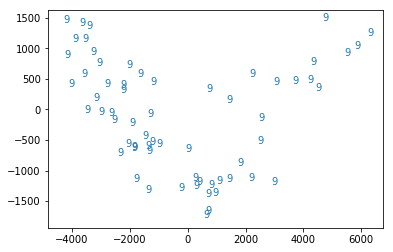

In [143]:
plot_embedding(Y, em, {1,2,3,4,5,6,7,8,10})

In [138]:
lle = LocallyLinearEmbedding()
em, f = fit_model(sX, lle)

73257


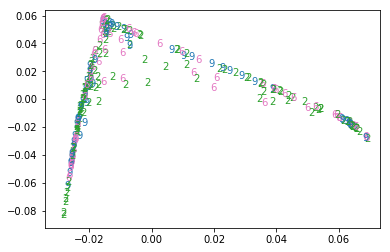

In [140]:
plot_embedding(Y, em, {1,3,4,5,7,8,10})

32
[10]
32
[10]
32
[10]
32
[10]


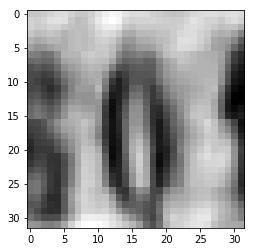

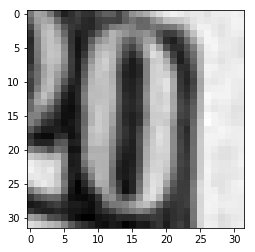

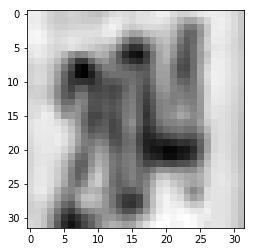

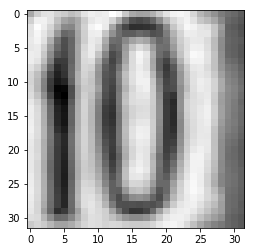

<Figure size 432x288 with 0 Axes>

In [151]:
for imgindex in range(100):
    if Y[imgindex][0] == 10:
        grayplt(X[imgindex])
        print Y[imgindex]
        plt.figure()

In [152]:
from skimage.data import page

ImportError: dlopen(/Users/firefly/Desktop/school/datamine/hw1/venv/lib/python2.7/site-packages/PIL/_imaging.so, 2): Symbol not found: _clock_gettime
  Referenced from: /Users/firefly/Desktop/school/datamine/hw1/venv/lib/python2.7/site-packages/PIL/.dylibs/liblzma.5.dylib (which was built for Mac OS X 10.12)
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/firefly/Desktop/school/datamine/hw1/venv/lib/python2.7/site-packages/PIL/.dylibs/liblzma.5.dylib

In [177]:
 from skimage.filters import threshold_sauvola

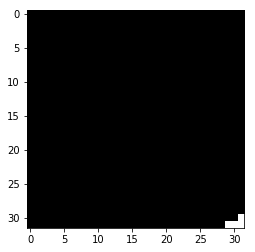

In [180]:
ts = threshold_sauvola(X[0].reshape(32,32), window_size=5)
b = X[0].reshape(32,32) > ts
grayplt(b)

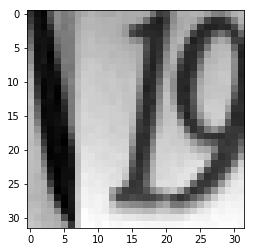

In [181]:
grayplt(X[0])

In [187]:
from sklearn.cluster import KMeans

In [255]:
kmeans = KMeans(2)
pixels = np.array([X[0]]).transpose()
model = kmeans.fit(pixels)

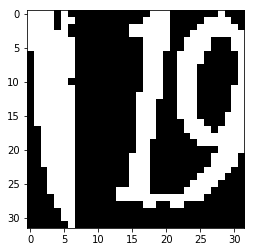

In [256]:
l = model.labels_
grayplt(l)

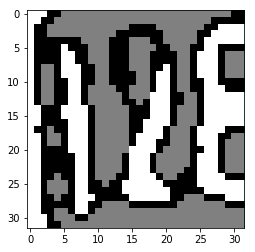

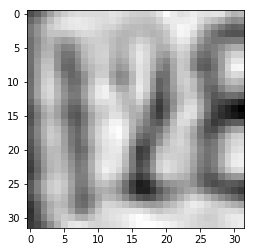

In [247]:
imgindex = 18
pixels = X[imgindex].reshape(-1,1)
fit = cluster_threshold(pixels, )
grayplt(fit.labels_)
plt.figure()
grayplt(X[imgindex])

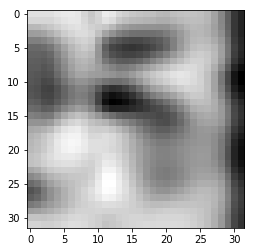

In [232]:
grayplt(X[5])

In [295]:
binpics = map(lambda e: cluster_threshold(e, 2).labels_, X)
binpics

[array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 1, ..., 1, 1, 1], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 1], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dt

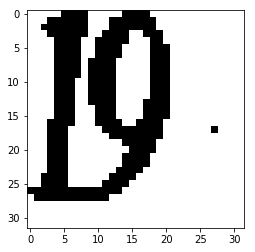

In [274]:
grayplt(binpics[1])

73257


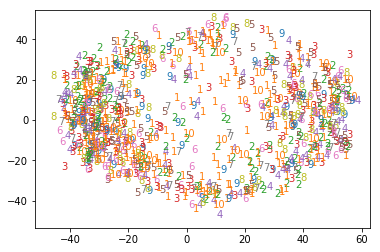

In [279]:
iso = Isomap()
em, f = fit_model(binpics, iso)
plot_embedding(Y, em)

In [296]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [298]:
clf.fit(binpics, Y.reshape(-1))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [300]:
clf.score(binpics,Y.reshape(-1))

0.234011766793617